# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import plotly.express as px
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import date
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('token.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = 'https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD'
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD'

In [5]:
## \1-Activities\05-APIs\1\07-Stu_House_of_Requests\Solved\url_parameters.ipynb

# Fetch current BTC price
btc_requests = requests.get(btc_url).json()
btc_value = btc_requests['data']['1']['quotes']['USD']['price']
print(btc_value)

# Fetch current ETH price
eth_requests = requests.get(eth_url).json()
eth_value = eth_requests['data']['1027']['quotes']['USD']['price']
print(eth_value, '\n')

# Compute current value of my crypto
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f}")

61894.0
4390.7 

The current value of your 1.2 BTC is $74,272.80
The current value of your 5.3 ETH is $23,270.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_spy = 50
my_agg = 200

In [7]:
## \01-Activities\05-APIs\2\04-Ins_Alpaca_Demo\Solved\alpaca-demo.ipynb

# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
base_url = 'https://paper-api.alpaca.markets'

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
date_today = date.today()
print(f"Today\'s date is: {date_today}")
today = pd.Timestamp(date_today, tz='America/New_York').isoformat()

# Set the tickers
tickers = ['AGG', 'SPY']

# Set timeframe to '1D' for Alpaca API
timeframe = '1D'

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 1000
).df

# Preview DataFrame
df_portfolio

Today's date is: 2021-10-28


AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2021-10-28 00:00:00-04:00  114.71  114.825  114.57  114.65  4971007  455.46   

                                                            
                            high     low   close    volume  
time                                                        
2021-10-28 00:00:00-04:00  458.4  455.45  458.27  43081788

In [9]:
# Pick AGG and SPY close prices
spy_close_price = float(df_portfolio['SPY']['close'])
agg_close_price = float(df_portfolio['AGG']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.65
Current SPY closing price: $458.27


In [10]:
# Compute the current value of shares
## 05-APIs\2\05-Stu_Investment_Value\Solved\investment-value.ipynb
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}.")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}.")
print(f"The total value of your investment portfolio is ${(my_spy_value + my_agg_value):0,.2f}.")

The current value of your 200 AGG shares is $22,930.00.
The current value of your 50 SPY shares is $22,913.50.
The total value of your investment portfolio is $45,843.50.


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = round(my_btc_value + my_eth_value, 2)
shares_value = round(my_agg_value + my_spy_value, 2)

# Create savings DataFrame
df_savings = pd.DataFrame(
    {'amount': [crypto_value, shares_value]},
    ['crypto','shares'],
)

# Display savings DataFrame
df_savings

,amount
crypto,97543.51
shares,45843.50


array([<AxesSubplot:ylabel='amount'>], dtype=object)

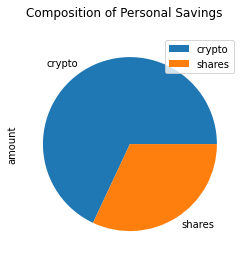

In [12]:
# Plot savings pie chart
df_savings.plot.pie(
    subplots=True,
    title='Composition of Personal Savings',
    y='amount',
    )

In [13]:
# Pie chart using plotly express
fig = px.pie(df_savings,
             values='amount',
             names=df_savings.index,
             labels={'index':'asset'},
             title='Composition of Personal Savings',
             hover_data=['amount']
)
fig.update_layout(
    legend_title_text='asset',
    hoverlabel=dict(
        bgcolor='white',
    ),
    legend=dict(
        bordercolor='Black',
        borderwidth=1,
    )
)
fig.show()

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Emergency fund amount: ${emergency_fund:,.2f}")

# Calculate total amount of savings
savings_value = df_savings['amount'].sum()
print(f"Savings amount: ${savings_value:,.2f}")

# Validate saving health
def savings_health(savings_value):
    if savings_value > emergency_fund:
        print('Amazing! You\'ve saved more than the minimum for your emergency fund!')
    elif savings_value == emergency_fund:
        print('Congratulations! You\'ve reached your emergency fund goal!')
    elif savings_value < emergency_fund:
        print(f'You still need to save ${(emergency_fund - savings_value):0,.2f} to meet your goal. Keep at it!')

print(f"\nsavings_value > emergency_fund:")
savings_health(savings_value)

Emergency fund amount: $36,000.00
Savings amount: $143,387.01

savings_value > emergency_fund:
Amazing! You've saved more than the minimum for your emergency fund!


In [15]:
# Test other validation messages
print(f"savings_value == emergency_fund:")
savings_health(36000)
print()

print(f"savings_value < emergency_fund:")
savings_health(35000)

savings_value == emergency_fund:
Congratulations! You've reached your emergency fund goal!

savings_value < emergency_fund:
You still need to save $1,000.00 to meet your goal. Keep at it!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
date_five_years = date_today - relativedelta(years=5)
print(f"Today's date is {date_today}.")
print(f"The date five years ago was {date_five_years}.")
start_date = pd.Timestamp(date_five_years, tz='America/New_York').isoformat()
end_date = pd.Timestamp(date_today, tz='America/New_York').isoformat()

Today's date is 2021-10-28.
The date five years ago was 2016-10-28.


In [17]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                       SPY  \
                             open    high     low    close   volume    open   
time                                                                          
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734  258.46   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380  257.73   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306  257.73   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797  257.32   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310  257.40   

                                                               
                               high     low   close    volume  
time                                                           
2017-11-08 00:00:00-05:00  259.2200  258.15  259.13  32174191  
2017-11-09 00:00:00-05:00  258.3900  256.36  258.20  75322217  
2017-11-10 00:00:00-05:00  258.2100  257.37  258.08  35755951  
2017-11-13 00:00:00-05:00  258.5900  257.27  258.34  31963013  
2017-11-14 00:00:00-05:00  258.3581  256.52  257.75  41935632

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_forecast = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4,.6],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [19]:
# Printing the simulation input data
mc_forecast.portfolio_data.head()

AGG                                    \
                             open    high     low    close   volume   
time                                                                  
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-11-08 00:00:00-05:00          NaN  258.46  259.2200  258.15  259.13   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.3900  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.2100  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.5900  257.27  258.34   
2017-11-14 00:00:00-05:00     0.001147  257.40  258.3581  256.52  257.75   

                                                  
                             volume daily_return  
time                                              
2017-11-08 00:00:00-05:00  32174191          NaN  
2017-11-09 00:00:00-05:00  75322217    -0.003589  
2017-11-10 00:00:00-05:00  35755951    -0.000465  
2017-11-13 00:00:00-05:00  31963013     0.001007  
2017-11-14 00:00:00-05:00  41935632    -0.002284

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_forecast.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


d:\Saru\Documents\Bootcamp\bcs-assignments\homework\bcs-hw5-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991788,1.000509,0.992614,0.986817,0.996701,0.987915,0.998080,0.999120,1.005569,1.003888,...,0.999521,1.005271,0.999875,0.996030,0.989129,1.000242,0.992799,1.010404,1.004778,1.009606
2,0.983807,1.001918,0.992377,0.980065,0.996011,0.977831,0.998294,1.007572,0.991027,1.000022,...,0.990154,1.011199,0.999236,0.984454,0.976968,1.000528,0.989665,1.025645,0.999011,1.012035
3,0.991130,0.986459,0.977094,0.972424,0.992539,0.976265,1.011497,1.001912,0.991962,1.006806,...,0.996577,1.003047,1.007666,0.992104,0.966848,1.005647,0.992053,1.026980,0.996903,1.008005
4,0.983422,0.987306,0.984378,0.975151,0.983849,0.975949,1.011035,1.002342,0.986773,1.002428,...,0.991476,0.984962,1.009538,0.992561,0.985543,1.017529,1.003173,1.027816,0.999011,0.999020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.707737,15.783162,22.135775,8.676329,10.483720,48.135823,11.658652,20.466794,40.954931,11.311734,...,6.682515,4.414020,8.060133,8.075571,41.198414,17.091845,8.628759,14.436522,8.689555,10.921893
7557,15.642705,16.010548,22.168968,8.660247,10.365201,47.785806,11.820667,20.610607,40.760121,11.286264,...,6.796814,4.395194,8.123013,8.104181,40.436059,17.080556,8.612814,14.169328,8.624240,10.930177
7558,15.702023,15.908365,22.195956,8.663467,10.377176,46.907585,11.842564,20.281186,40.720650,11.198874,...,6.763034,4.424121,8.129515,8.195978,39.830268,16.987605,8.630605,14.186395,8.678693,10.976319
7559,15.667142,15.849878,21.972219,8.741818,10.449454,46.958785,11.753357,20.163965,40.704642,11.058246,...,6.801773,4.452315,8.043693,8.211469,39.899015,16.761563,8.678929,14.271618,8.828024,11.108612


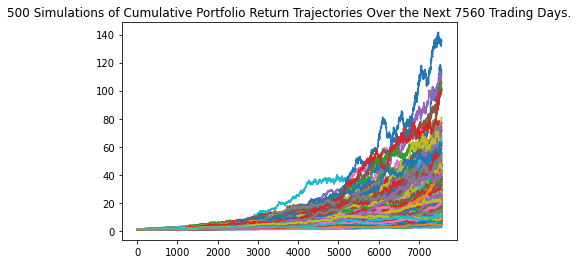

In [21]:
# Plot simulation outcomes
mc_plot = mc_forecast.plot_simulation()

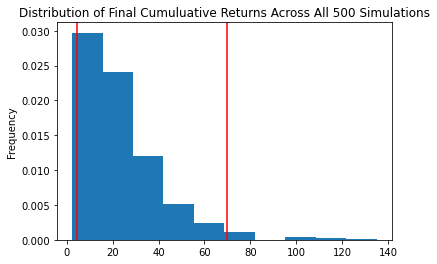

In [22]:
# Plot probability distribution and confidence intervals
mc_dist = mc_forecast.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = mc_forecast.summarize_cumulative_return()

# Print summary statistics
print(mc_summary)

count           500.000000
mean             23.695729
std              18.071604
min               2.388227
25%              11.306431
50%              18.813796
75%              30.874681
max             134.987343
95% CI Lower      4.490525
95% CI Upper     69.697842
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_summary[8] * initial_investment,2)
ci_upper = round(mc_summary[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f}"
      f" in the portfolio over the next 30 years will end within the"
      f" range of ${ci_lower:,} and ${ci_upper:,}.")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within the range of $89,810.51 and $1,393,956.84.


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(mc_summary[8] * initial_investment,2)
ci_upper = round(mc_summary[9] * initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,} and ${ci_upper:,}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $134,715.76 and $2,090,935.26


## Optional Challenge - Early Retirement

### Functions

In [26]:
# Variable representing number of years until retirement
# years = 0

# Configure MCSimulation to forecast cumulative returns after specified number of years
# The percentage split of `stocks` and `bonds` should be entered as decimals, and the sum should equal 1
def mc_sim(stocks, bonds, years):
    return MCSimulation(
        portfolio_data = df_stock_data,
        weights = [stocks, bonds],
        num_simulation = 500,
        num_trading_days = 252 * int(years)
    )

# forecast = mc_sim(.4, .6, 5)
# forecast

In [ ]:
# forecast.portfolio_data.head()

In [27]:
# forecast.calc_cumulative_return()

In [ ]:
# forecast.plot_simulation()

In [ ]:
# forecast.plot_distribution()

In [ ]:
# summary = forecast.summarize_cumulative_return()
# summary

In [28]:
# Calculate expected portfolio return at the 95% lower and upper confidence intervals
# Function takes parameters for number of `years`, `summary` for that time frame, and `initial_investment` amount
def confidence(years, summary, initial):
    ci_lower = round(summary[8] * initial,2)
    ci_upper = round(summary[9] * initial,2)
    
    print(f"There is a 95% chance that an initial investment of ${initial:,.2f}"
          f" in the portfolio over the next {years} years will end within the"
          f" range of ${ci_lower:,} and ${ci_upper:,}.")

# confidence(5, summary, 20000)

In [29]:
# Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment
# Same parameters as above, plus the decimal `rate` the initial investment is multiplied by (e.g. `rate` of 1.5 = 50% increase)
def inc_confidence(years, summary, initial, rate):
    inc_investment = initial * rate
    ci_lower = round(summary[8] * inc_investment,2)
    ci_upper = round(summary[9] * inc_investment,2)
    
    print(f"There is a 95% chance that an initial investment of ${inc_investment:,.2f}"
          f" in the portfolio over the next {years} years will end within the"
          f" range of ${ci_lower:,} and ${ci_upper:,}.")

# inc_confidence(5, summary, 20000, 1.5)

### Five Year Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, with 40% stocks and 60% bonds
forecast_5y = mc_sim(.4, .6, 5)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
forecast_5y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


d:\Saru\Documents\Bootcamp\bcs-assignments\homework\bcs-hw5-APIs\Starter_Code\MCForecastTools.py:117: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.007034,0.995537,1.008383,0.994525,0.998611,0.992599,1.011485,1.000591,0.999262,1.001044,...,0.995743,1.011399,1.008520,0.996260,1.003912,0.996396,1.014507,0.992147,1.006797,0.983759
2,1.004682,1.000754,1.017261,0.991428,0.991276,0.999251,1.024980,1.015828,0.992281,0.994644,...,0.994146,1.009328,1.003764,1.002827,1.006367,0.986157,1.012161,0.988659,1.003692,0.988869
3,1.004289,1.006253,1.018963,0.992217,0.998691,1.005198,1.009594,1.004295,0.988428,0.988272,...,0.982104,1.019247,1.008091,0.992489,1.012497,0.990924,1.004633,0.993617,0.999209,0.986424
4,1.015514,1.001171,1.015999,0.988790,0.994530,0.986166,1.003992,1.006015,0.981992,0.998391,...,0.980489,1.024181,1.003157,0.990300,1.035347,0.987127,1.012243,0.983268,1.014716,0.994387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.935666,2.392895,2.065444,1.132314,1.501620,1.880397,1.518491,1.719702,1.331590,1.951660,...,1.739384,1.120487,1.461898,2.412563,1.312667,1.279273,1.182314,0.913467,1.466617,1.240992
1257,0.937058,2.404752,2.065832,1.104477,1.489838,1.904763,1.521053,1.721758,1.331528,1.948655,...,1.739240,1.126786,1.446613,2.409957,1.316734,1.282740,1.186724,0.915461,1.456536,1.246699
1258,0.939193,2.402757,2.074147,1.115588,1.501934,1.898903,1.517026,1.715081,1.333371,1.965684,...,1.736454,1.140763,1.451737,2.397253,1.319380,1.286449,1.184214,0.913784,1.471392,1.240731
1259,0.928308,2.396350,2.079414,1.120947,1.509443,1.884741,1.517930,1.713058,1.337294,1.974702,...,1.757027,1.152458,1.454825,2.378457,1.312571,1.306560,1.184645,0.912717,1.465313,1.237123


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

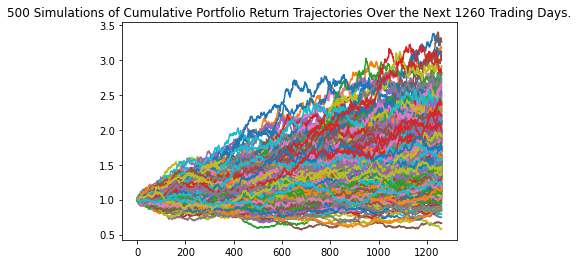

In [32]:
# Plot simulation outcomes
forecast_5y.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

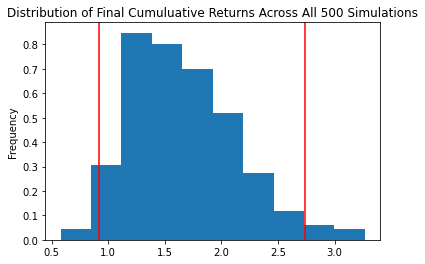

In [33]:
# Plot probability distribution and confidence intervals
forecast_5y.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_5y = forecast_5y.summarize_cumulative_return()

# Print summary statistics
summary_5y

count           500.000000
mean              1.665390
std               0.472007
min               0.577844
25%               1.312453
50%               1.599681
75%               1.968054
max               3.267069
95% CI Lower      0.915824
95% CI Upper      2.737993
Name: 1260, dtype: float64

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment:.2f} in the portfolio"
#       f" over the next 5 years will end within in the range of"
#       f" ${ci_lower_five} and ${ci_upper_five}")

In [37]:
# Expected portfolio return after five years with an initial investment of $60,000
confidence(5, summary_5y, 60000)

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 5 years will end within the range of $54,949.46 and $164,279.6.


In [38]:
# Expected returns with a 50% increase to initial investment
inc_confidence(5, summary_5y, 20000, 1.5)

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 5 years will end within the range of $27,474.73 and $82,139.8.


### Ten Years Retirement Option

In [39]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns, with 60% stocks and 40% bonds
forecast_10y = mc_sim(.6, .4, 10)

In [41]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
forecast_10y.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994808,0.996270,1.003430,1.002817,0.992729,1.001303,0.992475,1.004820,1.002065,1.000667,...,0.986220,1.003661,0.990999,0.994895,0.989061,1.016102,0.997490,1.004275,0.997544,0.999807
2,1.007433,0.993370,1.002088,0.995891,0.990901,1.008679,0.997097,1.010567,1.001252,1.005065,...,0.985572,0.999406,0.990769,0.995971,0.988580,1.014196,0.994673,1.008277,0.998686,0.993062
3,1.008364,0.990044,1.005207,0.994145,0.981450,1.010494,1.006822,1.009347,0.996387,1.005115,...,0.986825,1.012577,0.982248,0.994858,0.991781,1.017759,1.004996,1.001367,1.003864,0.996395
4,1.007684,0.994672,0.995547,0.988984,0.982909,1.008190,1.011958,1.009129,1.005083,1.007648,...,0.985737,1.012095,0.983404,0.998776,0.999099,1.022443,1.005377,0.998115,1.001326,1.005116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.087343,2.275180,1.817091,2.150881,2.761861,2.337213,1.671327,1.443316,2.457563,1.617651,...,2.085293,2.673676,2.205300,2.378722,1.934072,2.249026,1.607371,1.708246,2.448714,2.553725
2517,3.096551,2.284072,1.832360,2.143936,2.750987,2.360933,1.663976,1.451122,2.465708,1.624551,...,2.065235,2.675586,2.213360,2.385591,1.948430,2.261379,1.605029,1.716098,2.450118,2.569519
2518,3.095989,2.260259,1.847054,2.153107,2.745349,2.364756,1.673997,1.455826,2.473691,1.616056,...,2.057672,2.668687,2.203625,2.363293,1.953230,2.280465,1.610718,1.699370,2.459979,2.553957
2519,3.107023,2.252240,1.839810,2.135645,2.766129,2.376725,1.677449,1.448622,2.471416,1.605244,...,2.056776,2.670142,2.212678,2.368689,1.958934,2.275796,1.616674,1.706265,2.477615,2.570174


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

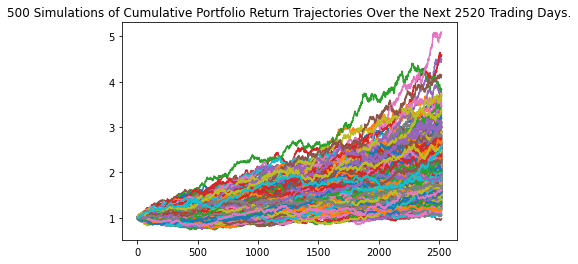

In [42]:
# Plot simulation outcomes
forecast_10y.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

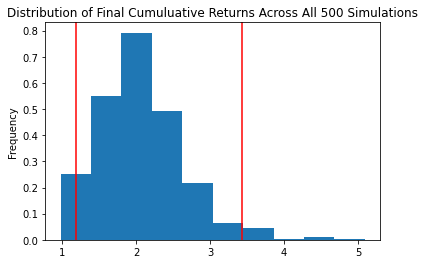

In [43]:
# Plot probability distribution and confidence intervals
forecast_10y.plot_distribution()

In [44]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_10y = forecast_10y.summarize_cumulative_return()

# Print summary statistics
summary_10y

count           500.000000
mean              2.070592
std               0.575819
min               0.977280
25%               1.666080
50%               2.009682
75%               2.383664
max               5.093175
95% CI Lower      1.190644
95% CI Upper      3.425336
Name: 2520, dtype: float64

In [45]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
# print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
#       f" over the next 10 years will end within in the range of"
#       f" ${ci_lower_ten} and ${ci_upper_ten}")

In [46]:
# Expected portfolio return after ten years with an initial investment of $60,000
confidence(10, summary_10y, 60000)

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within the range of $71,438.66 and $205,520.19.


In [47]:
# Expected returns with a 50% increase to initial investment
inc_confidence(10, summary_10y, 60000, 1.5)

There is a 95% chance that an initial investment of $90,000.00 in the portfolio over the next 10 years will end within the range of $107,157.99 and $308,280.28.
